# Brief - Les modèles dans tous leurs états

### Tutoriel 3 - Le dataset Iris & le modèle K-means

Avec ce dernier tutoriel, nous allons aborder un exemple de modèle de K-means. Ici, nous n'avons pas un modèle supervisé. Avec un dataset 'iris, nous souhaitons trouver et établir des groupes de fleurs à partir du dataset, sans information préalables sur le type de fleurs.

Dans un premier temps, installons les librairies nécessaires

In [309]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.cluster import KMeans

from sklearn.datasets import load_digits
from sklearn import datasets, metrics
from sklearn.datasets import load_iris

###### Analyse du dataset

Nous avons un dataset iris à disposition. Pour le lire, il nous faut utiliser la commande load.iris(), qui est permise grâce aux packages datasets de sklearn.

In [310]:
# Import the dataset iris
iris = sklearn.datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [311]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Dans ce dataset, chaque ligne correspond à des données(4) d'une fleur, avec les variables explicatives suivantes :
- sepal lenght
- sepal width
- petal lentght
- petal width

et il y a 3 classes pour distinguer ces fleurs (0, 1, 2), qui doivent renvoyer à aux fleurs suivantes : setosa, versicolor et virginica.

Pour une meilleure visualisation des données, je propose de mettre ces données sous forme d'un dataframe :

In [312]:
# utiliser la librairie pandas pour avoir un tableau
df_iris = pd.DataFrame(iris.data)
df_iris

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [313]:
# rajouter le nom des colonnes pour plus de clarté
df_iris.columns = [
    "sepal_lenght",
    "sepal_width",
    "petal_lenght",
    "petal_width"
]
df_iris

,sepal_lenght,sepal_width,petal_lenght,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


###### Construction du modèle K-means

Tout d'abord, pour ce tutoriel, nous choisirons de faire un modèle à partir de deux variables, ici, la longueur et la largeur des pétales. Nous allons sélectionner ces données de notre dataframe.

In [314]:
iris = iris.data[:,(0,2)]
iris

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

Pour faire notre entrainement de K-means, nous allons utiliser la librairie Scikit-Learn. On indique le nombre de clusters à former et utiliser la commande .fit() pour les calculer.

Contrairement, à un apprentissage supervisé, nous n'avons pas besoin de données test/apprentissage.


In [322]:
# construction du modèle de k-means
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(iris)
print(kmeans.labels_)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Lorsqu'on exécute ce code, nous avons un tableau recensant le numéro de cluster pour chaque lignes de caractéristiques (donc, une fleur). Nous avons demandé 3 clusters différents, que l'on retrouve ici : 0 - 1 - 2.

Suite à cela, nous pouvons tester une première visualisation de ce tableau dans un nuage de points et voir les clusters qui se sont formés.

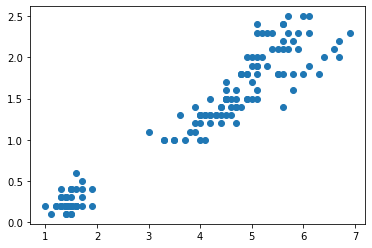

In [324]:
plt.scatter(df_iris['petal_lenght'], df_iris['petal_width'])

En prenant la longueur et la largeur des pétales, on voit qu'il y a deux groupes de fleurs qui se distinguent. A noter que nous avons intégrer 2 variables, nous pourrions en mettre une 3e place par exemple, mais on ne serait plus sur un tableau 2D ...

Pour une visualisation plus complète et pour réellement se représenter les différentes catégories, on va distinguer des labels dans notre nuage de points.

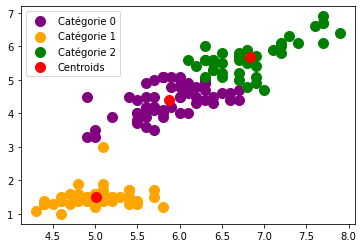

In [326]:
#Visualising the clusters
plt.scatter(iris[y_kmeans == 0, 0], iris[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Catégorie 0')
plt.scatter(iris[y_kmeans == 1, 0], iris[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Catégorie 1')
plt.scatter(iris[y_kmeans == 2, 0], iris[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Catégorie 2')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

Nos clusters ont pris forme et nous avons les centroids servant de centre de chacun de nos clusters. Si nous avions de nouvelles données pour une nouvelles fleurs, nous pourrions la placer sur cette représentation, et voir vers quels centroids elle se raproche pour connaître sa catégorie.